In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
dataset = 'https://www.kaggle.com/datasets/emmarex/plantdisease'

In [ ]:
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: isihack
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease


100%|██████████| 658M/658M [00:01<00:00, 360MB/s]


In [ ]:
import os

print("Contents of ./plantdisease:")
print(os.listdir('./plantdisease'))


Contents of ./plantdisease:
['plantvillage', 'PlantVillage']


In [ ]:
import os

paths_to_check = [
    './plantdisease/plantvillage',
    './plantdisease/PlantVillage',
    './plantdisease/extracted'
]

for path in paths_to_check:
    print(f"\n Checking: {path}")
    try:
        print(" Subfolders:", os.listdir(path))
    except Exception as e:
        print(" Error:", e)



 Checking: ./plantdisease/plantvillage
 Subfolders: ['PlantVillage']

 Checking: ./plantdisease/PlantVillage
 Subfolders: ['Tomato__Target_Spot', 'Tomato_Late_blight', 'Tomato_Septoria_leaf_spot', 'Pepper__bell___Bacterial_spot', 'Potato___Late_blight', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_healthy', 'Tomato_Bacterial_spot', 'Potato___Early_blight', 'Tomato_Early_blight', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_Leaf_Mold', 'Potato___healthy', 'Pepper__bell___healthy']

 Checking: ./plantdisease/extracted
 Error: [Errno 2] No such file or directory: './plantdisease/extracted'


In [ ]:
import os
import shutil
import random
from pathlib import Path

# Paths
src_dir = Path('./plantdisease/PlantVillage')
dst_dir = Path('./plantdisease_subset')
dst_dir.mkdir(parents=True, exist_ok=True)

# Pick 5 random class folders
selected_classes = random.sample(os.listdir(src_dir), 5)

print("Selected classes:", selected_classes)

# Copy ≤100 images per class into new folder
for cls in selected_classes:
    src_class_dir = src_dir / cls
    dst_class_dir = dst_dir / cls
    dst_class_dir.mkdir(parents=True, exist_ok=True)

    images = [f for f in os.listdir(src_class_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    for img in random.sample(images, min(100, len(images))):
        shutil.copy(src_class_dir / img, dst_class_dir / img)

print("Dataset subset created at:", dst_dir)


Selected classes: ['Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Early_blight', 'Tomato__Tomato_mosaic_virus', 'Tomato_Bacterial_spot']
Dataset subset created at: plantdisease_subset


In [ ]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
data_dir = './plantdisease_subset'  # Directory containing selected subset
image_size = (224, 224)             # Standard input size for most CNNs
batch_size = 32

## Load Dataset using `image_dataset_from_directory`

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

class_names = train_ds.class_names
print(f'Loaded classes: {class_names}')

Found 500 files belonging to 5 classes.
Using 400 files for training.
Found 500 files belonging to 5 classes.
Using 100 files for validation.
Loaded classes: ['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


##  Visualize Sample Images from the Training Dataset

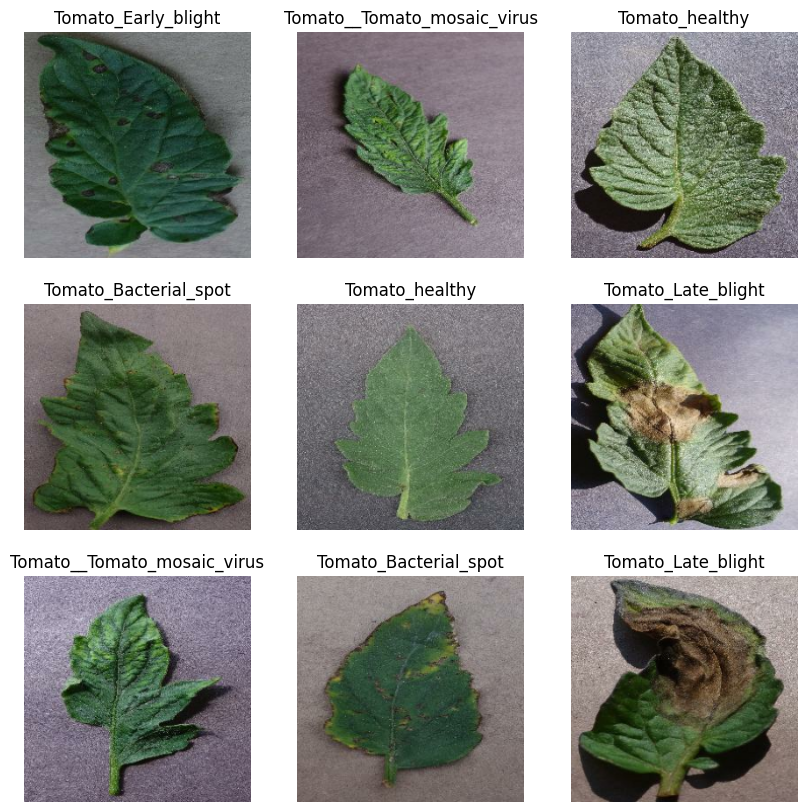

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

## Define Data Augmentation Layers

In [ ]:
from keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

## Visualize Augmented Images

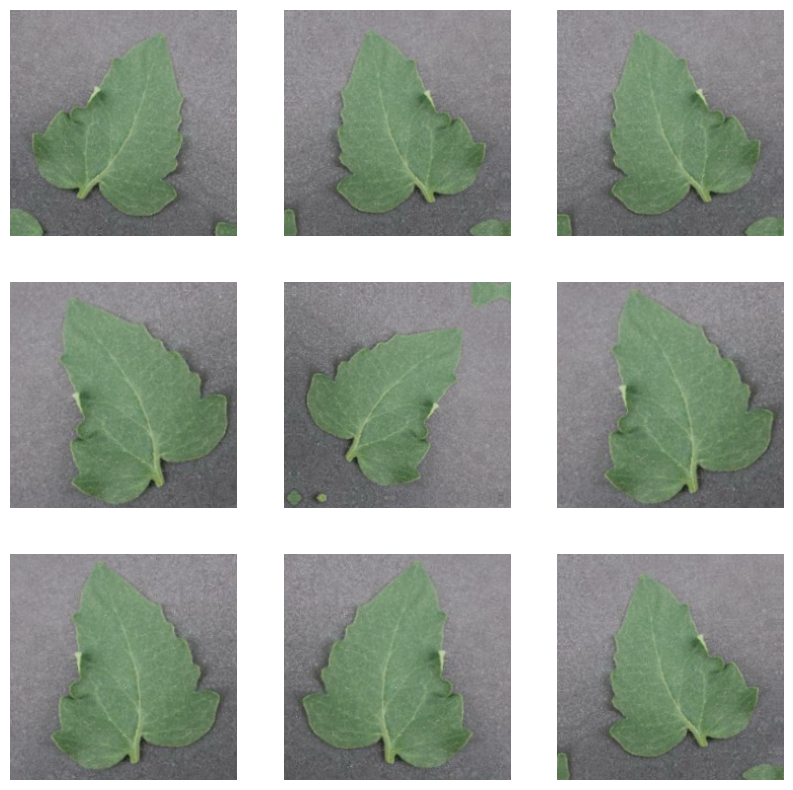

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented[0].numpy().astype("uint8"))
        plt.axis("off")

##  Optimize Pipeline with Prefetching

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
print('Data pipeline with prefetching is ready.')

Data pipeline with prefetching is ready.


## Load Dataset with Keras

We use `tf.keras.preprocessing.image_dataset_from_directory`  
to load images and automatically label them based on directory names.


In [ ]:
import tensorflow as tf

data_dir = './plantdisease_subset'
image_size = (224, 224)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

class_names = train_ds.class_names
# Prefetch for better performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


Found 500 files belonging to 5 classes.
Using 400 files for training.
Found 500 files belonging to 5 classes.
Using 100 files for validation.
Found 500 files belonging to 5 classes.
Using 100 files for validation.


##  Data Augmentation

We apply random horizontal flip, rotation, and zoom to increase model robustness.


In [ ]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1)
])


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


## Cleaning Invalid Images

We check for and remove corrupted images before training.


In [ ]:
import os

def remove_corrupt_images(directory):
    removed = 0
    for folder in os.listdir(directory):
        folder_path = os.path.join(directory, folder)
        for img in os.listdir(folder_path):
            try:
                img_path = os.path.join(folder_path, img)
                img_obj = tf.keras.preprocessing.image.load_img(img_path)
            except:
                os.remove(img_path)
                removed += 1
    print(f"✅ Removed {removed} corrupt images.")

remove_corrupt_images(data_dir)


✅ Removed 0 corrupt images.


##  Transfer Learning with MobileNetV2

We freeze the base MobileNetV2 layers and add custom dense layers on top.


In [ ]:
import os

# Dimension of resized image
DEFAULT_IMAGE_SIZE = (256, 256)

# Number of images used to train the model
N_IMAGES = 100

root_dir = './plantdisease_subset'

train_dir = os.path.join(root_dir)
val_dir = os.path.join(root_dir)


In [ ]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, DEFAULT_IMAGE_SIZE)
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
from sklearn.preprocessing import LabelBinarizer
import pickle

# Encode the labels into binary classes (One-Hot)
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)

# Save the label binarizer for future use (e.g., in prediction)
with open('plant_disease_label_transform.pkl', 'wb') as f:
    pickle.dump(label_binarizer, f)

# Number of unique classes detected
n_classes = len(label_binarizer.classes_)
print(f"✅ Total number of classes: {n_classes}")


✅ Total number of classes: 5


In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ✅ Initialize Data Augmentation
augment = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2
)


In [49]:

EPOCHS = 25
STEPS = 100
LR = 1e-3
BATCH_SIZE = 32
WIDTH = 256
HEIGHT = 256
DEPTH = 3

 Optimizer, Loss, and Callbacks

In [42]:
from tensorflow.keras import layers, models

def build_model(input_shape=(256, 256, 3), num_classes=5):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = build_model()
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │    31,490,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,510,213 (120.20 MB)

 Trainable params: 31,510,213 (120.20 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.001)

model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)


In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augment = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)


In [45]:
import numpy as np

print("Train class counts:", np.sum(y_train, axis=0))
print("Test class counts:", np.sum(y_test, axis=0))


Train class counts: [80 80 80 80 80]
Test class counts: [20 20 20 20 20]


In [46]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
]


 Training Loop with Data Augmentation

In [47]:
history = model.fit(
    augment.flow(x_train, y_train, batch_size=32, shuffle=True),
    validation_data=(x_test, y_test),
    steps_per_epoch=int(np.ceil(len(x_train) / 32)),
    epochs=25,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 75s 6s/step - accuracy: 0.1947 - loss: 5.1687 - val_accuracy: 0.2100 - val_loss: 1.6003
Epoch 2/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 64s 5s/step - accuracy: 0.3170 - loss: 1.5521 - val_accuracy: 0.3700 - val_loss: 1.3875
Epoch 3/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 73s 6s/step - accuracy: 0.3860 - loss: 1.4090 - val_accuracy: 0.5900 - val_loss: 1.0428
Epoch 4/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 83s 6s/step - accuracy: 0.5641 - loss: 1.1092 - val_accuracy: 0.6100 - val_loss: 0.9727
Epoch 5/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 0.6172 - loss: 0.9637 - val_accuracy: 0.6900 - val_loss: 0.7279
Epoch 6/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 59s 5s/step - accuracy: 0.5910 - loss: 0.9559 - val_accuracy: 0.6700 - val_loss: 0.8978
Epoch 7/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 67s 5s/step - accuracy: 0.6665 - loss: 0.8135 - val_accuracy: 0.7100 - val_loss: 0.7394
Epoch 8/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 79s 6s/step - accuracy: 0.7561 - loss: 0.7219 - val_accuracy: 0.8000 - val_loss:

Training and Validation Curves

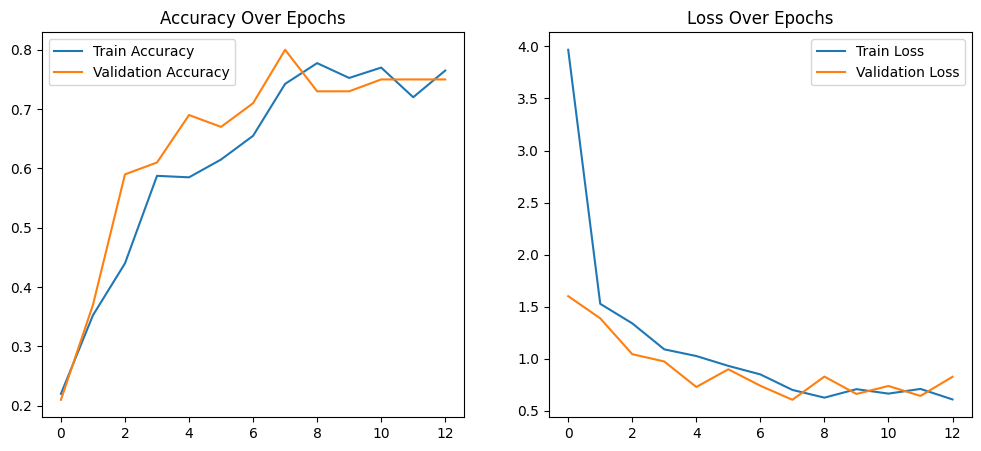

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.show()
